# Les statistiques de corpus (cours 4)

In [6]:
import pandas as pd

data = pd.read_csv("/Users/madalina/Documents/M1TAL/outils_trait_corpus/constitution-corpus/data/clean/news_combined.csv")

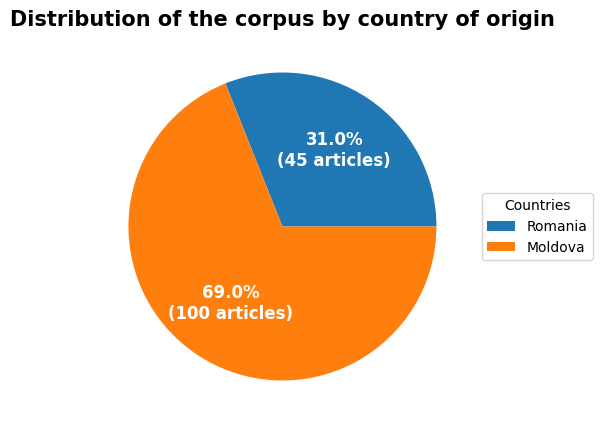

In [28]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))

labels = 'Romania', 'Moldova'
romanian_items = data[data.country == 'Romania' ]
moldovan_items = data[data.country == 'Moldova' ]
sizes = [len(romanian_items), len(moldovan_items)]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} articles)"

wedges, texts, autotexts = ax.pie(sizes, autopct=lambda pct: func(pct, sizes),
                                  textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="Countries",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Distribution of the corpus by country of origin", loc='center', fontsize=15, fontweight='bold')

plt.show()


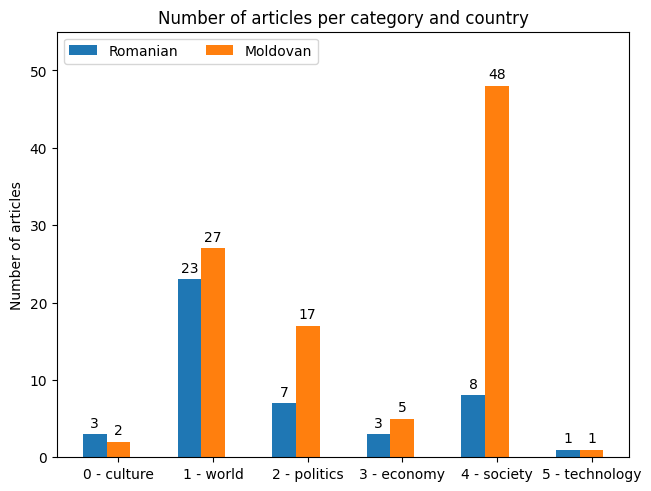

In [29]:

categories = ("0 - culture", "1 - world", "2 - politics", "3 - economy", "4 - society", "5 - technology")


romanian_culture = len(romanian_items[romanian_items.category == 0])
romanian_world = len(romanian_items[romanian_items.category == 1])
romanian_politics = len(romanian_items[romanian_items.category == 2])
romanian_economy = len(romanian_items[romanian_items.category == 3])
romanian_society = len(romanian_items[romanian_items.category == 4])
romanian_technology = len(romanian_items[romanian_items.category == 5])


moldovan_culture = len(moldovan_items[moldovan_items.category == 0])
moldovan_world = len(moldovan_items[moldovan_items.category == 1])
moldovan_politics = len(moldovan_items[moldovan_items.category == 2])
moldovan_economy = len(moldovan_items[moldovan_items.category == 3])
moldovan_society = len(moldovan_items[moldovan_items.category == 4])
moldovan_technology = len(moldovan_items[moldovan_items.category == 5])

distribution = {'Romanian': (romanian_culture, romanian_world,romanian_politics, romanian_economy, romanian_society, romanian_technology), 
                'Moldovan': (moldovan_culture, moldovan_world, moldovan_politics, moldovan_economy, moldovan_society, moldovan_technology)}

x = np.arange(len(categories))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for country, no_articles in distribution.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, no_articles, width, label=country)
    ax.bar_label(rects, padding=3)
    multiplier += 1


ax.set_ylabel('Number of articles')
ax.set_title('Number of articles per category and country')
ax.set_xticks(x + width, categories)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 55)

plt.show()


In [40]:
import spacy
nlp = spacy.load("ro_core_news_sm")

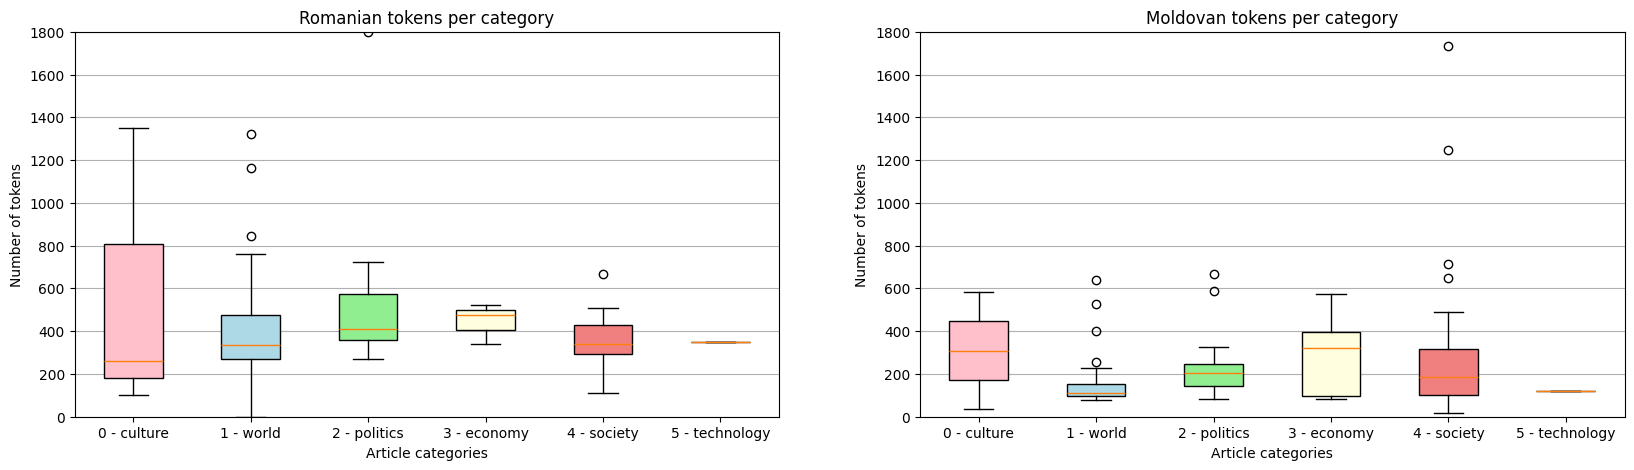

In [63]:
import matplotlib.pyplot as plt
import numpy as np

data["no_tokens"] = data["text"].apply(lambda x: len(nlp(x)))
romanian_items = data[data.country == 'Romania' ]
moldovan_items = data[data.country == 'Moldova' ]

romanian_tokens = romanian_items[["no_tokens", "category"]]
moldovan_tokens = moldovan_items[["no_tokens", "category"]]

# Random test data

romanian_data = [np.array(romanian_tokens[romanian_tokens["category"] == x]["no_tokens"]) for x in range(6)]
moldovan_data = [np.array(moldovan_tokens[moldovan_tokens["category"] == x]["no_tokens"]) for x in range(6)]

labels = ["0 - culture", "1 - world", "2 - politics", "3 - economy", "4 - society", "5 - technology"]

fig, (ax_ro, ax_md) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

bplot_ro = ax_ro.boxplot(romanian_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # used to label x-ticks
ax_ro.set_title('Romanian tokens per category')

# Moldovan tokens per category plot
bplot_md = ax_md.boxplot(moldovan_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # used to label x-ticks
ax_md.set_title('Moldovan tokens per category')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen', 'lightyellow', 'lightcoral', 'lightskyblue']
for bplot in (bplot_ro, bplot_md):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
# make the same scale
ax_ro.set_ylim(0, 1800)
ax_md.set_ylim(0, 1800)
# adding horizontal grid lines
for ax in [ax_ro, ax_md]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Article categories')
    ax.set_ylabel('Number of tokens')

plt.show()

# Loi de Zipf

In [84]:
def percentify(value, max):
    """
    Converts a value to a percentage of a maximum value.

    Parameters:
    value (int or float): The value to convert.
    max (int or float): The maximum value.

    Returns:
    int: The percentage of the value with respect to the maximum value.
    """
    return round(value / max * 100)

In [85]:
from scipy.interpolate import make_interp_spline

def smoothify(yInput, depth):
    """
    Generates smooth curves from the input data.

    Parameters:
        yInput (list): The input data.
        depth (int): The number of ranks to show.

    Returns:
        tuple: The x and y coordinates for the smooth curve.
    """
    x = np.array(range(0, depth))
    y = np.array(yInput)
    x_smooth = np.linspace(x.min(), x.max(), 600) 
    spl = make_interp_spline(x, y, k=3)
    y_smooth = spl(x_smooth)
    return x_smooth, y_smooth

In [86]:
def process_texts(texts, unwantedCharacters, depth):
    """
    Processes the texts by removing unwanted characters, splitting the texts into words, and counting the occurrences of each word.

    Parameters:
        texts (dict): A dictionary where the keys are the text names and the values are the texts.
        unwantedCharacters (list): A list of characters to remove from the texts.
        depth (int): The number of ranks to show.

    Returns:
        tuple: Two dictionaries where the keys are the text names and the values are the text lengths and the word counts, respectively.
    """
    textlengths = {}
    textwordamounts = {}
    for text in texts:
        for character in unwantedCharacters:
            texts[text] = texts[text].replace(character, '').lower()
        splittedText = texts[text].split(' ')
        textlengths[text] = len(splittedText)
        textwordamounts[text] = {}
        for i in splittedText:
            textwordamounts[text][i] = textwordamounts[text].get(i, 0) + 1
        textwordamounts[text] = dict(sorted(textwordamounts[text].items(), key=lambda x: x[1], reverse=True)[:depth])
    return textlengths, textwordamounts

In [88]:
def plot_texts(textwordamounts, textlengths, depth, xAxis):
    """
    Plots the word counts for each text.

    Parameters:
        textwordamounts (dict): A dictionary where the keys are the text names and the values are dictionaries of word counts.
        textlengths (dict): A dictionary where the keys are the text names and the values are the text lengths.
        depth (int): The number of ranks to show.
        xAxis (list): The labels for the x-axis.
    """

    ziffianCurveValues = [100/i for i in range(1, depth+1)]
    x, y = smoothify(ziffianCurveValues, depth)
    plt.plot(x, y, label='Ziffian Curve', ls=':', color='grey')
    for i in textwordamounts:
        maxValue = list(textwordamounts[i].values())[0]
        yAxis = [percentify(value, maxValue) for value in list(textwordamounts[i].values())]
        x, y = smoothify(yAxis, depth)
        plt.plot(x, y, label=i+f' [{textlengths[i]}]', lw=1, alpha=0.5)
    plt.xticks(range(0, depth), xAxis)
    plt.legend()
    plt.show()

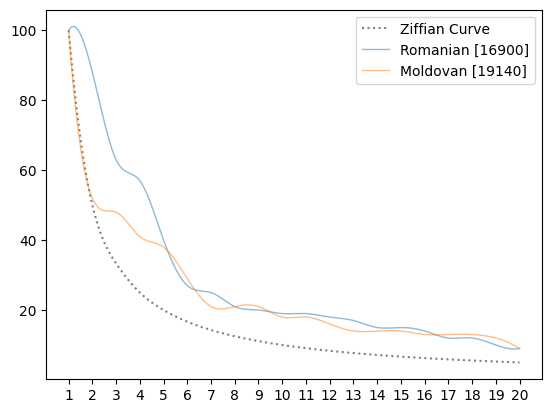

In [92]:
import csv
import string

"""
Read the texts from a CSV file, process the texts, and plots the word counts.
"""

texts = {"Romanian": "", "Moldovan": ""}
unwantedCharacters = list(string.punctuation)
depth = 20
xAxis = [str(number) for number in range(1, depth+1)]
with open("/Users/madalina/Documents/M1TAL/outils_trait_corpus/constitution-corpus/data/raw/news_combined.csv") as csvfile:
    file_reader = csv.DictReader(csvfile)
    for row in file_reader:
        if row["country"] == "Romania":
            texts["Romanian"] += row["text"]
        else:
            texts["Moldovan"] += row["text"]
textlengths, textwordamounts = process_texts(texts, unwantedCharacters, depth)
plot_texts(textwordamounts, textlengths, depth, xAxis)
